# Diabetes Analysis
LAGCC Data Analytics

Shelley Shen

This analysis aims to analyze and visualize diabetes data.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

raw_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
raw_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [43]:
df = raw_df.loc[:,['race', 'gender', 'age', 'time_in_hospital', 'num_medications', 'A1Cresult', 'readmitted']]
df

,race,gender,age,time_in_hospital,num_medications,A1Cresult,readmitted
0,Caucasian,Female,[0-10),1,1,None,NO
1,Caucasian,Female,[10-20),3,18,None,>30
2,AfricanAmerican,Female,[20-30),2,13,None,NO
3,Caucasian,Male,[30-40),2,16,None,NO
4,Caucasian,Male,[40-50),1,8,None,NO
...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,16,>8,>30
101762,AfricanAmerican,Female,[80-90),5,18,None,NO
101763,Caucasian,Male,[70-80),1,9,None,NO
101764,Caucasian,Female,[80-90),10,21,None,NO


In [82]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [84]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [15]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [10]:
df['time_in_hospital'].value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

In [44]:
df['num_medications'].value_counts()

13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64

In [11]:
df['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [12]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [71]:
df['race'] = df['race'].replace('?', 'Unknown')
df

,race,gender,age,time_in_hospital,num_medications,A1Cresult,readmitted
0,Caucasian,Female,[0-10),1,1,None,NO
1,Caucasian,Female,[10-20),3,18,None,>30
2,AfricanAmerican,Female,[20-30),2,13,None,NO
3,Caucasian,Male,[30-40),2,16,None,NO
4,Caucasian,Male,[40-50),1,8,None,NO
...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,16,>8,>30
101762,AfricanAmerican,Female,[80-90),5,18,None,NO
101763,Caucasian,Male,[70-80),1,9,None,NO
101764,Caucasian,Female,[80-90),10,21,None,NO


In [74]:
# filter for A1C >7 or >8 and readmitted <30
df1 = df.loc[(df['A1Cresult'] == '>8')|(df['A1Cresult'] == '>7')]
df1

,race,gender,age,time_in_hospital,num_medications,A1Cresult,readmitted
26,Caucasian,Male,[80-90),6,18,>7,NO
74,Caucasian,Female,[70-80),5,17,>7,>30
98,Other,Female,[50-60),2,6,>8,NO
117,Caucasian,Female,[70-80),10,24,>7,>30
123,Caucasian,Female,[70-80),11,16,>8,>30
...,...,...,...,...,...,...,...
101747,Caucasian,Female,[70-80),8,19,>7,>30
101748,Caucasian,Female,[40-50),14,16,>7,>30
101754,Caucasian,Female,[70-80),9,33,>7,>30
101755,Other,Female,[40-50),14,26,>8,>30


In [33]:
race_df = df1.groupby(['race'])['A1Cresult'].count().reset_index(name='count')

,race,count
0,AfricanAmerican,246
1,Asian,7
2,Caucasian,872
3,Hispanic,30
4,Other,19
5,Unknown,20


In [41]:
race_df.describe()

,count
count,6.000000
mean,199.000000
std,342.053797
min,7.000000
25%,19.250000
50%,25.000000
75%,192.000000
max,872.000000


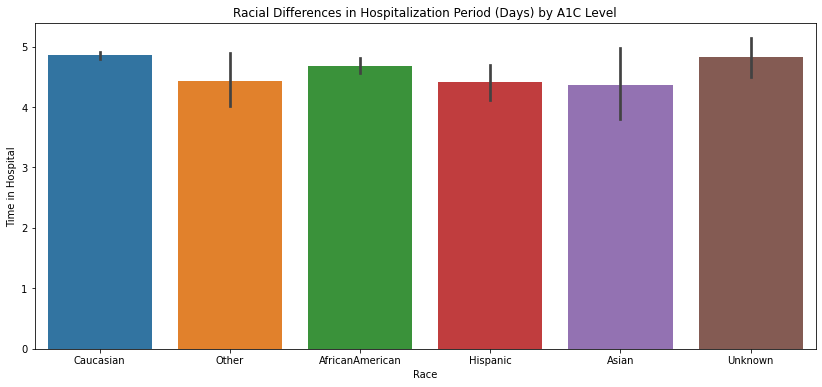

In [85]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df1,
            x='race',
            y='time_in_hospital',
           )
plt.title("Racial Differences in Hospitalization Period (Days) by A1C Level")
plt.xlabel('Race')
plt.ylabel('Time in Hospital')
plt.show()

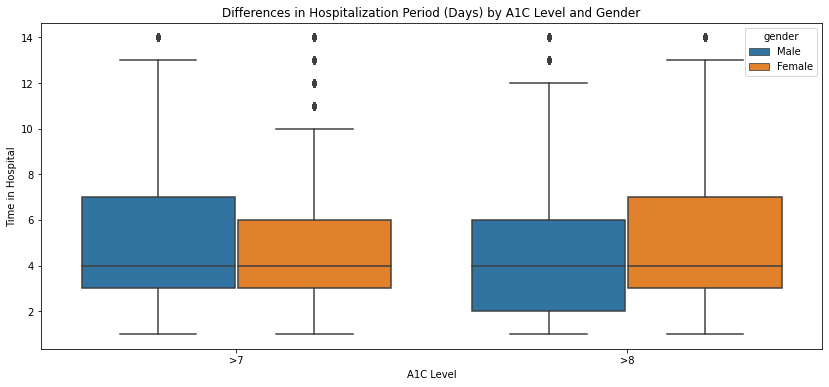

In [87]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1,
            x='A1Cresult',
            y='time_in_hospital',
            hue='gender'
           )
plt.title("Differences in Hospitalization Period (Days) by A1C Level and Gender")
plt.xlabel('A1C Level')
plt.ylabel('Time in Hospital')
plt.show()

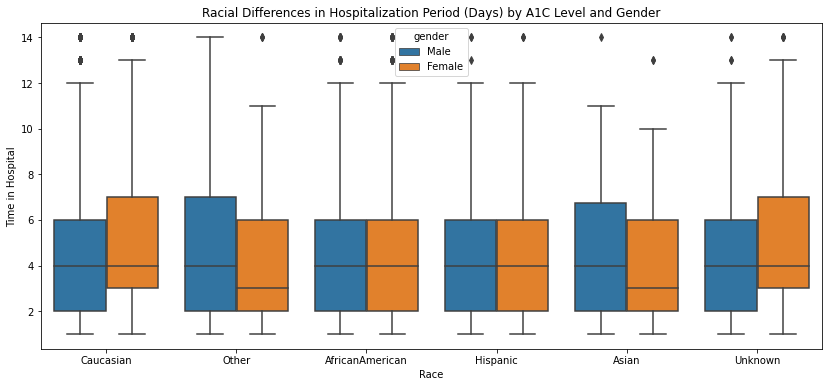

In [76]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1,
            x='race',
            y='time_in_hospital',
            hue='gender'
           )
plt.title("Racial Differences in Hospitalization Period (Days) by A1C Level and Gender")
plt.xlabel('Race')
plt.ylabel('Time in Hospital')
plt.show()

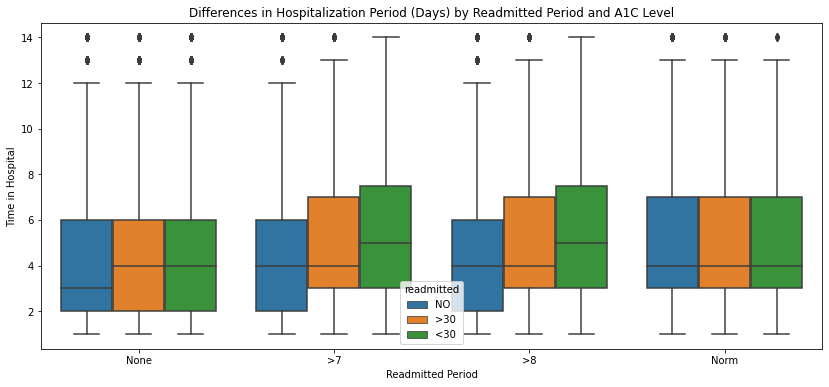

In [69]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df,
            x='A1Cresult',
            y='time_in_hospital',
            hue='readmitted'
           )
plt.title("Differences in Hospitalization Period (Days) by Readmitted Period and A1C Level")
plt.xlabel('Readmitted Period')
plt.ylabel('Time in Hospital')
plt.show()

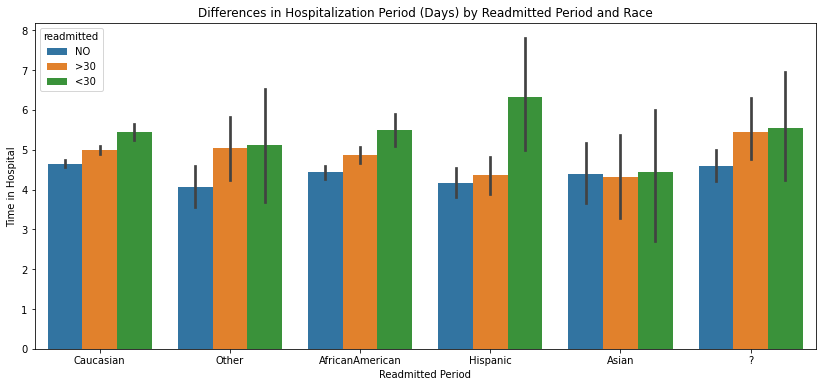

In [70]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df1,
            x='race',
            y='time_in_hospital',
            hue='readmitted'
           )
plt.title("Differences in Hospitalization Period (Days) by Readmitted Period and Race")
plt.xlabel('Readmitted Period')
plt.ylabel('Time in Hospital')
plt.show()

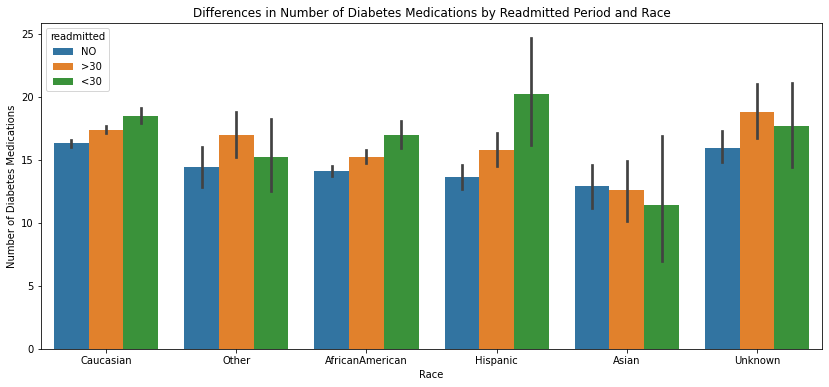

In [90]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df1,
            x='race',
            y='num_medications',
            hue='readmitted'
           )
plt.title("Differences in Number of Diabetes Medications by Readmitted Period and Race")
plt.xlabel('Race')
plt.ylabel('Number of Diabetes Medications')
plt.show()

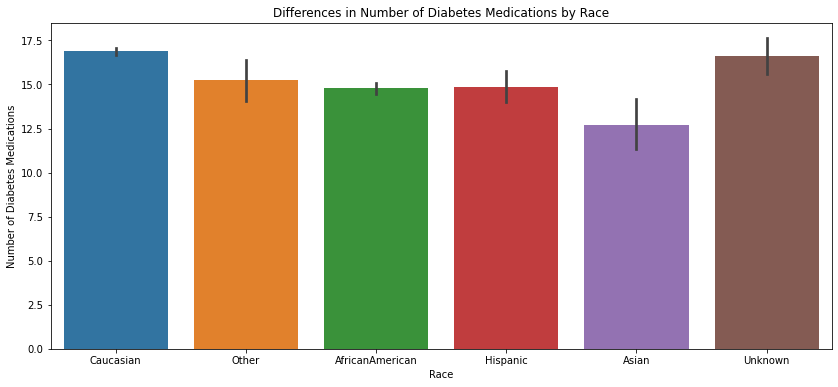

In [91]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df1,
            x='race',
            y='num_medications',
           )
plt.title("Differences in Number of Diabetes Medications by Race")
plt.xlabel('Race')
plt.ylabel('Number of Diabetes Medications')
plt.show()

## Conclusion 

53.8% of the population was female, and it was heavily skewed toward older age with the 70-80 year old category comprising the largest proportion. 

The average length of hospital was the same across A1C level and gender but higher among Caucasians and Unknown race patients, who are also taking more diabetes medications. Asian females and females with an Other race identificaiton had lower hospital stays than their male counterparts and females in other race categories. 

Hispanice patients readmitted to the hospital in less than 30 days had significantly longer time in hospital than Hispanic patients who were not readmitted or readmitted after 30 days. This also correlates with the higher number of diabetes medications taken by Hispanic patients readmitted within 30 days. 
